In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft
from matplotlib.animation import FuncAnimation, PillowWriter 
import pandas as pd
from sklearn.linear_model import LinearRegression
import time

In [91]:
# define parameters and functions:
alpha = .95
epsilon = .1 #.1 gives things that look like solitons
L = np.pi*4
V = -1
D_ = 0.6 #very intereting with D=0.5 (which is the same as Ma=1/4) and D = 0.6

In [92]:
N = 200
Nx = N
n = np.arange(N);
n[int(N/2)+1:] -= N
def RHS_static_cylinder(t,eta):
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
    eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
    deta_dt = -1/3*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + D_*eta_z + epsilon**2*eta_zzz))).real
    return deta_dt

def RHS_moving_cylinder(t,eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
    eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
    deta_dt = -1/3*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + D_*eta_z + epsilon**2*eta_zzz))).real
    deta_dt += - V*alpha/2*fft.ifft(2*n*np.pi/L*1j*fft.fft((1+eta/alpha)**2)).real
    return deta_dt

In [93]:
Lambda = L
T = 50
k = int(1/np.sqrt(2)/epsilon)
print(k)
z = np.linspace(-L/2, L/2, Nx)
t = np.linspace(0,T, 600)
t_span = (0,T)
u0 = (1 + np.sin(z*k)*0.95)*(1-alpha)*10
print(np.trapz(u0, z))

print('Starting solve')

#result_moving = scipy.integrate.solve_ivp(RHS_moving_cylinder, t_span, u0, 'BDF', atol = 1e-2, t_eval =t)
#u_moving = result_moving.y
#print(np.shape(u_moving), ' solved moving')
st = time.time()
result_static = scipy.integrate.solve_ivp(RHS_static_cylinder, t_span, u0, 'BDF', atol = 1e-3, t_eval = t)
u_static = result_static.y
print(np.shape(u_static), ' solved static')
et = time.time()
print(f'Time to solve {et-st} s')
Z,T = np.meshgrid(z,t)

7
6.283185307179592
Starting solve
(200, 600)  solved static
Time to solve 31.019246816635132 s


0.7500000000000007
0.5000000000000004
0.5007729683697462


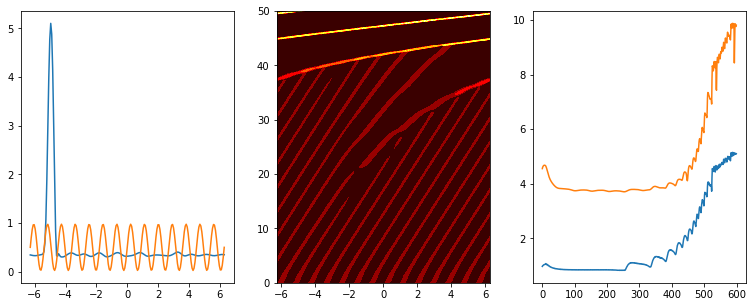

In [94]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(13,5))

#ax[0].contourf(Z,T,u_moving.T, cmap ='hot')
ax[0].plot(z, u_static[:,-1])
ax[0].plot(z,u0)
ax[1].contourf(Z,T,u_static.T, cmap ='hot')
#ax[2].plot(np.trapz(u_static, z, axis=0))
ax[2].plot(np.max(u_static, axis=0))
ax[2].plot(np.trapz(u_static**2, z, axis=0))
#plt.colorbar()
plt.savefig('soliton_test1.jpg')
print((1-alpha)*15)
print(np.trapz(u0,z)/L)
print(np.trapz(u_static[:,-1],z)/L)
#pd.DataFrame([z, u_static[:,-1]], index=['z','profile']).T.to_csv(f'soliton_lambda_{Lambda}.csv', header=False)
soliton = u_static[:,500]
#np.save(f'soliton_profile_march1_static.npy', soliton)
#np.save(f'z_valuesforsoliton_march1.npy', z)
#np.save(f'soliton_evolution_march1_static.npy',u_static)

1.5709163437870148
0.23902777367316436
0.26172186367941924
0.06273046830395367


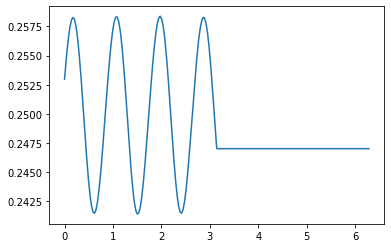

In [67]:
solitary_profile = u_static[:,-1]
refined_z = np.linspace(0, L, 1000)
refined_soliton = np.interp(refined_z,z,solitary_profile)
plt.plot(refined_z, refined_soliton)
fmin = np.min(solitary_profile);fmax = np.max(solitary_profile)
print(np.trapz(solitary_profile,z))
print(np.min(solitary_profile))
print(np.max(solitary_profile))
print((fmin**2+fmax**2+fmin*fmax)/3)

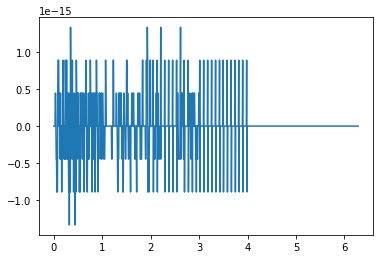

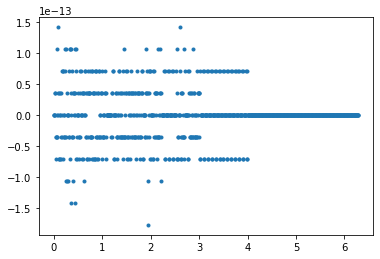

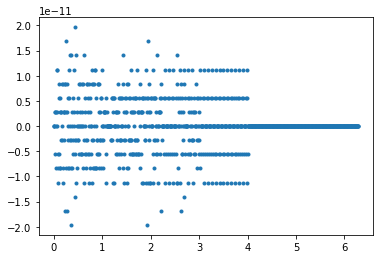

In [283]:
#derivatives
#plt.plot(refined_z, refined_soliton)
plt.plot(refined_z, np.gradient(refined_soliton, refined_z))
plt.show()
plt.plot(refined_z, np.gradient(np.gradient(refined_soliton, refined_z), refined_z), '.')
plt.show()
plt.plot(refined_z, np.gradient(np.gradient(np.gradient(refined_soliton, refined_z), refined_z), refined_z), '.')
plt.show()

In [71]:
solitary_profile = u_static[:,-1]
refined_z = np.linspace(0, L, 1000)
refined_soliton = np.interp(refined_z,z,solitary_profile)

7
Solving ... 
(200, 300)  solved static
Plotting ...


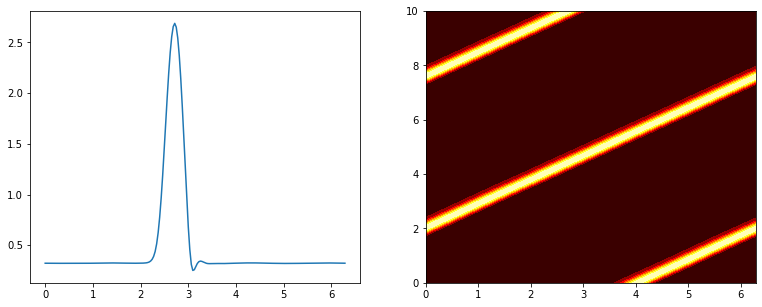

In [36]:
T = 10
k = int(1/np.sqrt(2)/epsilon)
print(k)
z = np.linspace(0, 2*np.pi, 200)
t = np.linspace(0,T, 300)
t_span = (0,T)
u0 = solitary_profile
print('Solving ... ')
#result_moving = scipy.integrate.solve_ivp(RHS_moving_cylinder, t_span, u0, 'BDF', atol = 1e-2, t_eval =t)
#u_moving = result_moving.y
#print(np.shape(u_moving), ' solved moving')
N = len(u0)
n = np.arange(N);
n[int(N/2)+1:] -= N
def RHS_static_cylinder(t,eta):
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
    eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
    deta_dt = -1/3*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + D_*eta_z + epsilon**2*eta_zzz))).real
    #deta_dt += - V*alpha/2*fft.ifft(2*n*np.pi/L*1j*fft.fft((1+eta/alpha)**2)).real
    return deta_dt


result_static = scipy.integrate.solve_ivp(RHS_static_cylinder, t_span, u0, 'BDF', atol = 1e-2, t_eval =t)
u_static = result_static.y
print(np.shape(u_static), ' solved static')

Z,T = np.meshgrid(z,t)
print('Plotting ...')
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(13,5))

#ax[0].contourf(Z,T,u_moving.T, cmap ='hot')
ax[0].plot(z, u_static[:,-1])
ax[1].contourf(Z,T,u_static.T, cmap ='hot')
#plt.colorbar()
plt.savefig('soliton_test1.jpg')

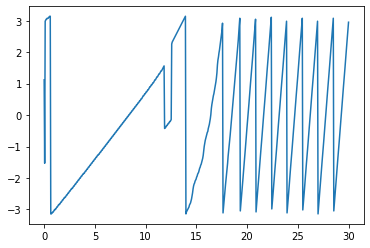

array([-4.30036446])

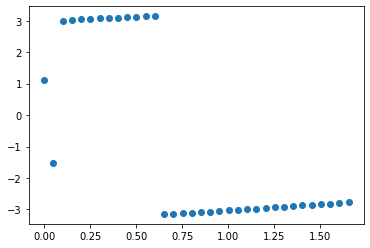

In [37]:
plt.plot(t, z[np.argmax(u_static, axis=0)]);plt.show()
plt.scatter(t[:34], z[np.argmax(u_static, axis=0)][:34])

linear_regressor = LinearRegression() 
linear_regressor.fit(t[:34].reshape(-1, 1),z[np.argmax(u_static, axis=0)][:34] )
linear_regressor.coef_

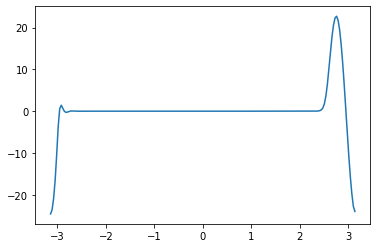

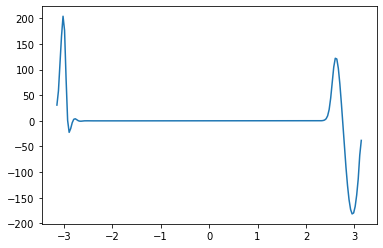

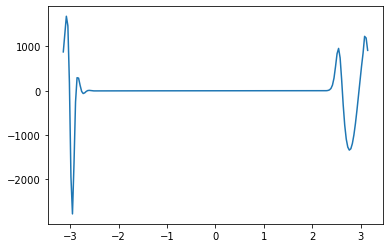

In [35]:
#derivatives
#plt.plot(refined_z, refined_soliton)
soliton = u_static[:,-1]
plt.plot(z, np.gradient(soliton, z))
plt.show()
plt.plot(z, np.gradient(np.gradient(soliton, z), z))
plt.show()
plt.plot(z, np.gradient(np.gradient(np.gradient(soliton, z), z), z))
plt.show()

In [36]:
### eta_xi =np.gradient(soliton, z)
eta_xixixi =np.gradient(np.gradient(np.gradient(soliton, z), z),z)
c = 1.1350314
eta_min = np.min(soliton)
plt.plot(z, 1/3*soliton**3*(1+D_*eta_xi+epsilon**2*eta_xixixi)-c*soliton+c*eta_min-eta_min**3/3) #+epsilon**2*eta_xixixi)

NameError: name 'eta_xi' is not defined

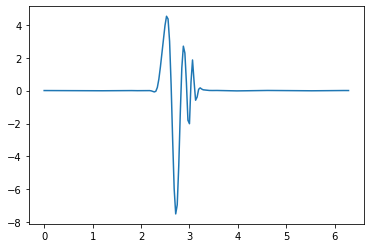

In [82]:
eta_xixixi = np.gradient(np.gradient(np.gradient(soliton, z), z),z)
c = 1.05
plt.plot(z, -c*eta_xi+1/3*np.gradient(soliton**3*(1+D_*eta_xi+epsilon**2*eta_xixixi), z))

In [85]:
u0 = (1.1 - np.sin(z*k))/2 
u0 = u0/np.trapz(u0,z)*Lambda
print(min(u0))

0.04341941585448336


# Fourier Series of soliton

$$f(\xi) = a_0/2+\sum\dots$$

6.283185307179586


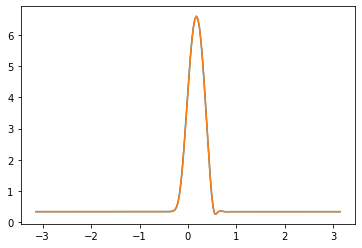

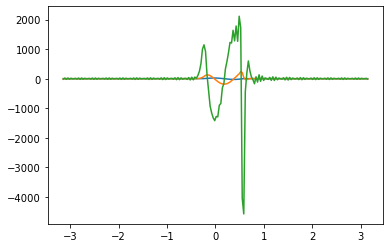

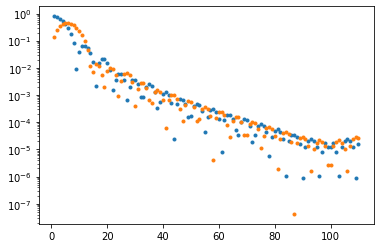

In [34]:
N_nodes = 110; nodes = np.arange(1, N_nodes+1)
a_0 = 2/L*np.trapz(soliton, z)
approx_soliton = np.zeros_like(z) +a_0/2; approx_soliton_z = np.zeros_like(z); 
approx_soliton_zz = np.zeros_like(z); approx_soliton_zzz = np.zeros_like(z); approx_soliton_zzzz = np.zeros_like(z)
a_vec = np.zeros(len(nodes)); b_vec = np.zeros(len(nodes))
print(L)
for j, k in enumerate(nodes):
    a_j = 2/L*np.trapz(soliton*np.cos(2*np.pi*k*z/L), z)
    b_j = 2/L*np.trapz(soliton*np.sin(2*np.pi*k*z/L), z)
    approx_soliton += a_j*np.cos(2*k*np.pi/L*z) + b_j*np.sin(2*k*np.pi/L*z)
    approx_soliton_z += (-a_j*np.sin(2*k*np.pi/L*z) + b_j*np.cos(2*k*np.pi/L*z))*(2*k*np.pi/L)
    approx_soliton_zz += (-a_j*np.cos(2*k*np.pi/L*z) + -b_j*np.sin(2*k*np.pi/L*z))*(2*k*np.pi/L)**2
    approx_soliton_zzz += (a_j*np.sin(2*k*np.pi/L*z) + -b_j*np.cos(2*k*np.pi/L*z))*(2*k*np.pi/L)**3
    approx_soliton_zzzz += (a_j*np.cos(2*k*np.pi/L*z) + b_j*np.sin(2*k*np.pi/L*z))*(2*k*np.pi/L)**4
    a_vec[j] = a_j; b_vec[j] = b_j
    
plt.plot(z, soliton)
plt.plot(z, approx_soliton)
plt.show()
plt.plot(z, approx_soliton_z)
plt.plot(z, approx_soliton_zz)
plt.plot(z, approx_soliton_zzz)
#plt.plot(z, approx_soliton_zzzz)
plt.show()
plt.semilogy(nodes, abs(a_vec), '.')
plt.semilogy(nodes, abs(b_vec), '.'); plt.show()

# computing c

In [451]:
N_nodes = 100; nodes = np.arange(1, N_nodes+1)
a_0 = 2/L*np.trapz(soliton, z)
approx_soliton = np.zeros_like(z) +a_0/2
eta_z = np.zeros_like(z); eta_zzz = np.zeros_like(z); 
a_vec = np.zeros(len(nodes)); b_vec = np.zeros(len(nodes))
print(L)
for j, k in enumerate(nodes):
    a_j = 2/L*np.trapz(soliton*np.cos(2*np.pi*k*z/L), z)
    b_j = 2/L*np.trapz(soliton*np.sin(2*np.pi*k*z/L), z)
    approx_soliton += a_j*np.cos(2*k*np.pi/L*z) + b_j*np.sin(2*k*np.pi/L*z)
    eta_z += (-a_j*np.sin(2*k*np.pi/L*z) + b_j*np.cos(2*k*np.pi/L*z))*2*k*np.pi/L
    eta_zzz += (a_j*np.sin(2*k*np.pi/L*z) - b_j*np.cos(2*k*np.pi/L*z))*(2*k*np.pi/L)**3
    a_vec[j] = a_j; b_vec[j] = b_j

6.283185307179586


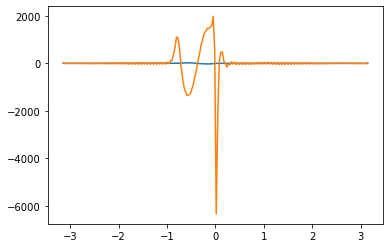

In [452]:
plt.plot(z, eta_z)
plt.plot(z, eta_zzz)

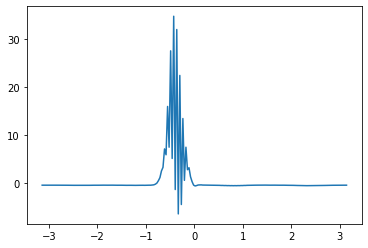

In [458]:
plt.plot(z, -approx_soliton*1.5+approx_soliton**3/3*(1+D_*eta_z+epsilon**2*eta_zzz))

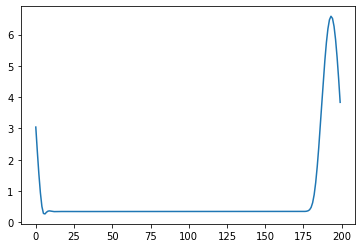

In [38]:
plt.plot(soliton)

In [82]:
soliton[0]

0.8772474967444066

# Code for cluster

In [90]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from scipy import fft
import time
# we are going to increase L
widths = np.linspace(np.pi*2, 1000, 200)


# define parameters and functions:
alpha = .95; epsilon = .1; L = np.pi*2
V = -1; D_ = 0.6 #very intereting with D=0.5 (which is the same as Ma=1/4) and D = 0.6
Lambda = L

N = 200; Nt = 200
Nx = N
T = 500
k = int(1/np.sqrt(2)/epsilon)
t = np.linspace(0,T, Nt)
t_span = (0,T)
n = np.arange(N);
n[int(N/2)+1:] -= N
results = np.zeros((N, Nt, len(widths)))
for j,L in enumerate(widths):
    z = np.linspace(-L/2, L/2, Nx)
    u0 = (1 + np.sin(z*k)*0.95)*(1-alpha)
    def RHS_static_cylinder(t,eta):
        eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
        eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
        deta_dt = -1/3*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + D_*eta_z + epsilon**2*eta_zzz))).real
        return deta_dt
    st = time.time()
    result_static = scipy.integrate.solve_ivp(RHS_static_cylinder, t_span, u0, 'BDF', atol = 1e-3, t_eval = t)
    u_static = result_static.y
    results[:,:,j] = u_static
np.save('profiles_different_lengths.npy', results)



KeyboardInterrupt: 

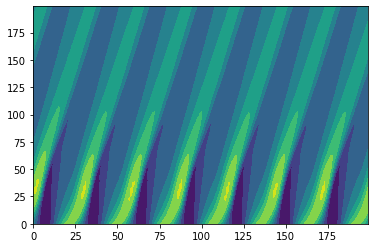

In [89]:
plt.contourf(results[:,:,0].T)